In [14]:
from config_PASCAL_VC import *
import scipy.io as sio
import matplotlib.pyplot as plt

category = 'motorbike'

filelist = Dataset['train_list'].format(category)

with open(filelist, 'r') as fh:
    contents = fh.readlines()
    
img_list = [cc.strip() for cc in contents]

print(len(img_list))


624


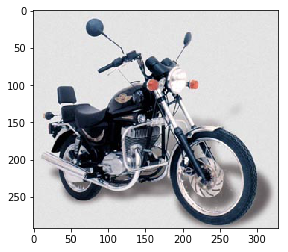

ZeroDivisionError: float division by zero

In [15]:
dir_img = Dataset['img_dir_org'].format(category)
dir_anno = Dataset['anno_dir'].format(category)
dir_save = Dataset['img_dir'].format(category)
if not os.path.exists(dir_save):
    os.makedirs(dir_save)

N = len(img_list)
for nn in range(19,20):
    if nn%100==0:
        print(nn)
        
    img_file = os.path.join(dir_img, '{}.JPEG'.format(img_list[nn]))
    # print(img_file)
    img=cv2.imread(img_file)
    plt.imshow(img[:,:,[2,1,0]])
    plt.show()
    
    height, width = img.shape[0:2]
    
    anno_file = os.path.join(dir_anno, '{}.mat'.format(img_list[nn]))
    assert(os.path.isfile(anno_file))
    mat_contents = sio.loadmat(anno_file)
    record = mat_contents['record']
    objects = record['objects']
    bbox = objects[0,0]['bbox'][0,0][0]
    bbox = [max(math.ceil(bbox[0]), 1), max(math.ceil(bbox[1]), 1), \
            min(math.floor(bbox[2]), width), min(math.floor(bbox[3]), height)]
    patch = img[bbox[1]-1: bbox[3], bbox[0]-1: bbox[2], :]
    # patch = cv2.resize(patch, (scale_size, scale_size))
    patch = myresize(patch, scale_size, 'short')
    plt.imshow(patch[:,:,[2,1,0]])
    plt.show()
    save_file = os.path.join(dir_save, '{}.JPEG'.format(img_list[nn]))
    cv2.imwrite(save_file, patch)

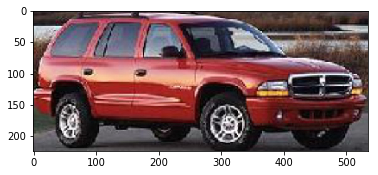

In [13]:
assert(os.path.isfile(save_file))
test = cv2.imread(save_file)
plt.imshow(test[:,:,[2,1,0]])
plt.show()

In [16]:
bbox

[465, 219, 329, 262]

In [17]:
objects[0,0]['bbox'][0,0][0]

array([ 464.48717949,  218.64918415,  466.52913753,  262.21095571])

In [1]:
import sys
import os
from config_PASCAL_VC import *

category = 'car'
img_dir = Dataset['img_dir'].format(category)
img_files = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]
lb_ls = []
for ii in img_files:
    imgnet_lb = ii.split('_')[0]
    if not imgnet_lb in lb_ls:
        lb_ls.append(imgnet_lb)
        
print(lb_ls)

['n03770679', 'n03498781', 'n02814533', 'n03770085', 'n03930630', 'n04166281', 'n04285965', 'n04037443', 'n02958343']


In [2]:
import numpy as np
lb_dict_file = '/export/home/qliu24/dataset/ILSVRC12/list_fg/cls_labels_1000.txt'
with open(lb_dict_file, 'r') as fh:
    contents = fh.readlines()
    
lb_idx = [cc.strip().split()[0] for cc in contents]
lb_txt = [cc.strip().split(' ', 1)[1] for cc in contents]

for ll in lb_ls:
    print('Total samples for {}: {}'.format(ll, np.sum(np.array([ii.split('_')[0] for ii in img_files])==ll)))
    if ll not in lb_idx:
        print('not found: {}'.format(ll))
        continue
        
    print('{}:{}'.format(lb_idx.index(ll), lb_txt[lb_idx.index(ll)]))

Total samples for n03770679: 658
656:minivan
Total samples for n03498781: 711
not found: n03498781
Total samples for n02814533: 671
436:beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon
Total samples for n03770085: 172
not found: n03770085
Total samples for n03930630: 635
717:pickup, pickup truck
Total samples for n04166281: 984
not found: n04166281
Total samples for n04285965: 825
not found: n04285965
Total samples for n04037443: 223
751:racer, race car, racing car
Total samples for n02958343: 596
not found: n02958343


In [4]:
rst_file = '/export/home/qliu24/PASCAL_VC/result_vgg/VGG_predict_{}.pickle'.format(category)
with open(rst_file, 'rb') as fh:
    predict_rst = pickle.load(fh)
    
cnt = np.bincount(predict_rst)
sort_cnt = np.argsort(-cnt)
for ni,nn in enumerate(sort_cnt):
    if np.sum(cnt[sort_cnt[ni:]])/np.sum(cnt) < 0.02:
        break
        
    print('{}; {}; {}; {} samples were assigned to this class'.format(nn, lb_idx[nn], lb_txt[nn], cnt[nn]))

436; n02814533; beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon; 924 samples were assigned to this class
656; n03770679; minivan; 770 samples were assigned to this class
717; n03930630; pickup, pickup truck; 368 samples were assigned to this class
751; n04037443; racer, race car, racing car; 177 samples were assigned to this class
817; n04285008; sports car, sport car; 147 samples were assigned to this class
609; n03594945; jeep, landrover; 79 samples were assigned to this class
511; n03100240; convertible; 75 samples were assigned to this class
627; n03670208; limousine, limo; 31 samples were assigned to this class
581; n03459775; grille, radiator grille; 30 samples were assigned to this class
654; n03769881; minibus; 30 samples were assigned to this class
734; n03977966; police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria; 24 samples were assigned to this class
468; n02930766; cab, hack, taxi, taxicab; 22 samples were assigned t